# New Measure - abasaglar

## Rationale

## Proposed Measure

**Title**: 

**Description**: 

**Why It Matters**: 

### Numerators and Denominators

## SQL and results

In [14]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps

In [17]:
#obtain AAF and EHF data from BQ, using measures.cpma_products as reference list

sql = """
SELECT
  rx.month,
  rx.pct,
  SUM(CASE
      WHEN dmd.controlled_drug_category = 10 THEN items --calculate schedule 5 items
      ELSE 0 END) AS s5_items,
  SUM(CASE
      WHEN dmd.controlled_drug_category IN(4,5,6,7)  THEN items --calculate schedule 3 items
      ELSE 0 END) AS s3_items,
  IEEE_DIVIDE(SUM(CASE
      WHEN dmd.controlled_drug_category = 10 THEN items
        ELSE 0 END), SUM(items)) AS s5_percent_items,   -- calculate schedule 5 items proportion,
  IEEE_DIVIDE(SUM(CASE
      WHEN dmd.controlled_drug_category IN(4,5,6,7) THEN items
        ELSE 0 END), SUM(items)) AS s3_percent_items   -- calculate schedule 5 items proportion
FROM
  hscic.normalised_prescribing_standard AS rx
  join
  ebmdatalab.dmd.product as dmd
  on
  rx.bnf_code=dmd.bnf_code
  join
  hscic.ccgs as ccgs
  on
  ccgs.code=rx.pct
WHERE
ccgs.org_type = 'CCG'
and month >='2015-10-01'
GROUP BY
  month,
  pct
ORDER BY
  month
"""
df = bq.cached_read(sql, csv_path='cd_df.csv', use_cache=True)
df['month'] = df['month'].astype('datetime64[ns]')



This shows a considerable decrease, particularly in last 18 months.  *CHECK bnf_codes in case of change*

## Modelling for measure

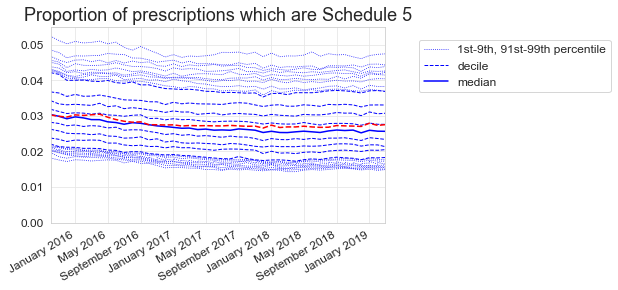

In [19]:
#create sample deciles

charts.deciles_chart(
        df,
        period_column='month',
        column='s5_percent_items',
        title="Proportion of prescriptions which are Schedule 5",
        show_outer_percentiles=True)

#add in example CCG (NEW Devon - 99P)
df_subject = df.loc[df['pct'] == '99P']
plt.plot(df_subject['month'], df_subject['s5_percent_items'], 'r--')
plt.show()

There is significant use in some CCGs.

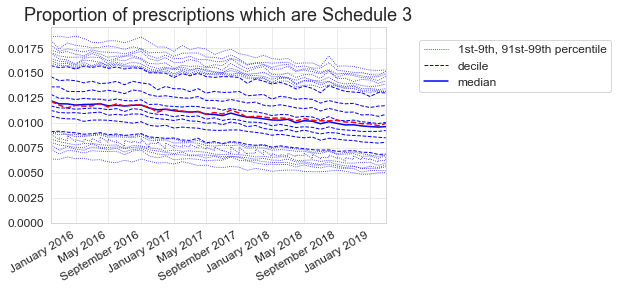

In [20]:
#create sample deciles

charts.deciles_chart(
        df,
        period_column='month',
        column='s3_percent_items',
        title="Proportion of prescriptions which are Schedule 3",
        show_outer_percentiles=True)

#add in example CCG (NEW Devon - 99P)
df_subject = df.loc[df['pct'] == '99P']
plt.plot(df_subject['month'], df_subject['s3_percent_items'], 'r--')
plt.show()

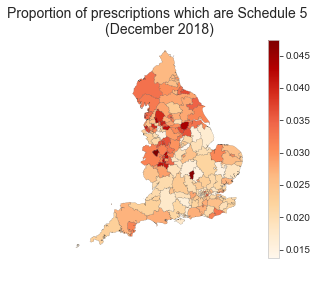

In [21]:
#create choropeth map of AAF proportion
latest_df = df.loc[df['month'] == '2018-12-01']
plt = maps.ccg_map(latest_df, title="Proportion of prescriptions which are Schedule 5 \n(December 2018)", column='s5_percent_items', cartogram=False)
plt.show()

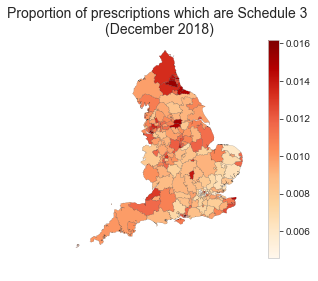

In [23]:
#create choropeth map of AAF proportion
latest_df = df.loc[df['month'] == '2018-12-01']
plt = maps.ccg_map(latest_df, title="Proportion of prescriptions which are Schedule 3 \n(December 2018)", column='s3_percent_items', cartogram=False)
plt.show()